# Toy embeddings

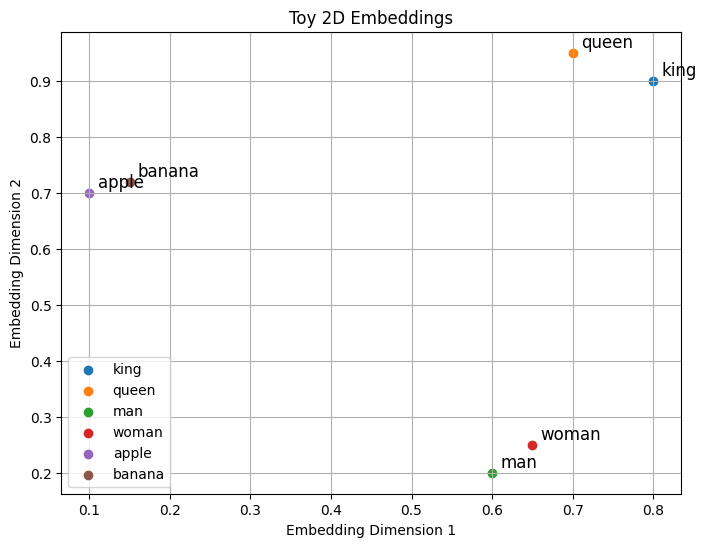

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define a few words and assign them simple 2D embeddings (for intuition)
embedding_dict = {
    "king":      np.array([0.8, 0.9]),
    "queen":     np.array([0.7, 0.95]),
    "man":       np.array([0.6, 0.2]),
    "woman":     np.array([0.65, 0.25]),
    "apple":     np.array([0.1, 0.7]),
    "banana":    np.array([0.15, 0.72]),
}

# Plot them
plt.figure(figsize=(8,6))
for word, vec in embedding_dict.items():
    plt.scatter(*vec, label=word)
    plt.text(vec[0]+0.01, vec[1]+0.01, word, fontsize=12)

plt.title("Toy 2D Embeddings")
plt.xlabel("Embedding Dimension 1")
plt.ylabel("Embedding Dimension 2")
plt.grid(True)
plt.legend()
plt.show()


# Embeddings in the real life

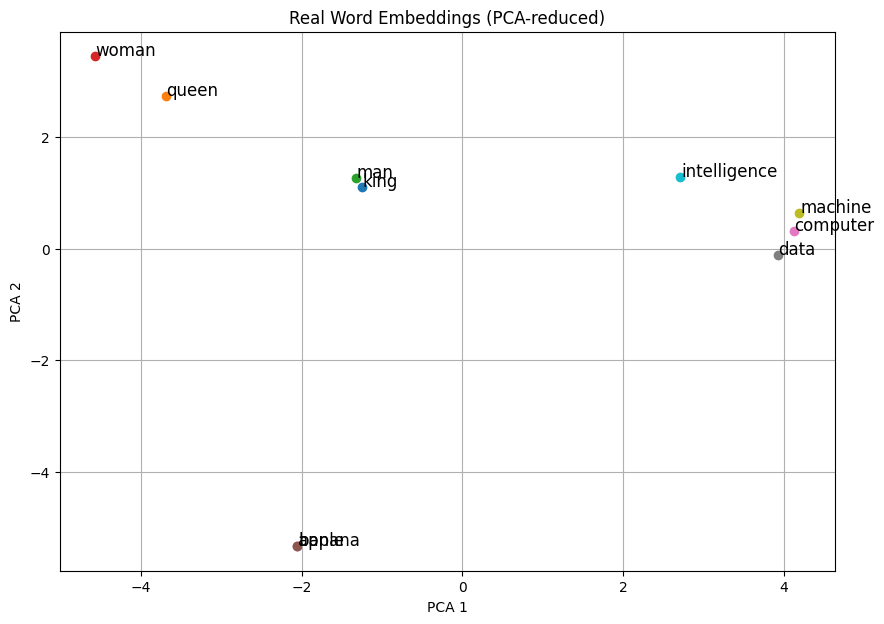

In [13]:
import spacy
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load spaCy's small English model (has word vectors)
nlp = spacy.load("en_core_web_md")  # medium model has vectors

# Select words
words = ["king", "queen", "man", "woman", "apple", "banana", "computer", "data", "machine", "intelligence"]

# Get embeddings
vectors = np.array([nlp(word).vector for word in words])

# Reduce to 2D for plotting
pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

# Plot
plt.figure(figsize=(10,7))
for i, word in enumerate(words):
    x, y = reduced[i]
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word, fontsize=12)

plt.title("Real Word Embeddings (PCA-reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


# RoBERTa

In [14]:
import numpy as np
from transformers import RobertaTokenizer, RobertaModel
import torch
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Check for MPS (Apple M3 GPU) availability
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

try:
    # Step 1: Load tokenizer and model
    tokenizer = RobertaTokenizer.from_pretrained("roberta-base")
    model = RobertaModel.from_pretrained("roberta-base").to(device)

    # Step 2: Define a sentence
    sentence = "Artificial intelligence is transforming the world."

    # Step 3: Tokenize the sentence and get embeddings
    inputs = tokenizer(sentence, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model(**inputs)

    # Step 4: Extract last hidden state (embedding for each token)
    last_hidden_state = outputs.last_hidden_state.squeeze(0)  # Shape: [seq_len, hidden_size]
    tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"].squeeze())

    # Step 5: Reduce dimensionality for 2D plotting
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(last_hidden_state.cpu().numpy())  # Move to CPU for numpy

    # Step 6: Plot embeddings of each token
    plt.figure(figsize=(10, 7))
    for i, token in enumerate(tokens):
        x, y = reduced[i]
        plt.scatter(x, y)
        plt.text(x + 0.01, y + 0.01, token, fontsize=12)

    plt.title("RoBERTa Token Embeddings (PCA Reduced)")
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

Using device: mps
An error occurred: 
RobertaModel requires the PyTorch library but it was not found in your environment. Check out the instructions on the
installation page: https://pytorch.org/get-started/locally/ and follow the ones that match your environment.
Please note that you may need to restart your runtime after installation.

